# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.metrics import silhouette_score
from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('FOOD-DATA.csv')
df = pd.read_csv(
    'FOOD-DATA.csv',
    sep=';',                   
    index_col=0,               
    skipinitialspace=True      
)
df = df.drop(columns='Unnamed: 0', errors='ignore')
print(df.columns)
df.head()

Index(['Caloric Value', 'Fat', 'Saturated Fats', 'Monounsaturated Fats',
       'Polyunsaturated Fats', 'Carbohydrates', 'Sugars', 'Protein',
       'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water', 'Vitamin A',
       'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2', 'Vitamin B3',
       'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D', 'Vitamin E',
       'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium', 'Manganese',
       'Phosphorus', 'Potassium', 'Selenium', 'Zinc', 'Nutrition Density'],
      dtype='object')


,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,51,5.0,2.9,1.3,0.200,0.8,0.500,0.9,0.0,14.6,...,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.07
1,215,19.4,10.9,4.9,0.800,3.1,2.700,7.8,0.0,62.9,...,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.1
2,49,3.6,2.3,0.9,0.000,0.9,3.400,0.8,0.1,0.0,...,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.4
3,30,2.0,1.3,0.5,0.002,1.5,0.091,1.5,0.0,9.8,...,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,30,2.3,1.4,0.6,0.042,1.2,0.900,1.2,0.0,8.1,...,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
print("Bentuk dataset(Baris,Kolom): ",df.shape)
print("\nJumlah data duplikat: ", df.duplicated().sum())
print("\nMissing value dari masing-masing kolom:\n", df.isnull().sum())
print("\nData Info:")
df.info()

print("\nStatistik Deskriptif: \n")
df.describe()


Bentuk dataset(Baris,Kolom):  (2395, 34)

Jumlah data duplikat:  1

Missing value dari masing-masing kolom:
 Caloric Value           0
Fat                     0
Saturated Fats          0
Monounsaturated Fats    0
Polyunsaturated Fats    0
Carbohydrates           0
Sugars                  0
Protein                 0
Dietary Fiber           0
Cholesterol             0
Sodium                  0
Water                   0
Vitamin A               0
Vitamin B1              0
Vitamin B11             0
Vitamin B12             0
Vitamin B2              0
Vitamin B3              0
Vitamin B5              0
Vitamin B6              0
Vitamin C               0
Vitamin D               0
Vitamin E               0
Vitamin K               0
Calcium                 0
Copper                  0
Iron                    0
Magnesium               0
Manganese               0
Phosphorus              0
Potassium               0
Selenium                0
Zinc                    0
Nutrition Density       0
dtype: 

,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,...,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc
count,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,...,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000,2395.000000
mean,223.769520,10.176276,3.924917,4.133622,2.152844,18.589021,4.457459,13.400777,2.235790,62.171937,...,0.198753,52.047728,9.581689,1.853271,34.429792,5.349964,156.236052,303.833939,52.258006,1.579192
std,384.728244,29.008915,19.502262,12.939587,7.145738,29.406134,13.339929,32.294246,5.404483,385.352876,...,3.449759,115.933379,69.912400,5.155650,71.927990,21.005332,333.257099,589.507589,199.257203,4.937509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.500000,0.300000,0.064000,0.058000,0.071000,0.500000,0.000000,0.800000,0.000000,0.000000,...,0.000000,0.600000,0.040000,0.100000,1.500000,0.037000,0.800000,27.750000,0.016000,0.055000
50%,117.000000,2.100000,0.500000,0.500000,0.400000,6.800000,0.086000,3.500000,0.200000,0.000000,...,0.007000,13.900000,0.100000,0.600000,10.400000,0.200000,42.300000,112.300000,0.053000,0.300000
75%,258.000000,9.400000,2.700000,3.400000,1.700000,25.050000,3.200000,13.300000,2.200000,26.450000,...,0.066000,48.250000,0.400000,1.800000,36.950000,0.700000,171.350000,340.500000,0.090000,1.200000
max,6077.000000,550.700000,672.000000,291.100000,188.000000,390.200000,291.500000,560.300000,76.500000,10509.000000,...,166.400000,1283.500000,1890.000000,121.200000,921.600000,451.000000,5490.000000,11336.900000,3308.000000,147.300000


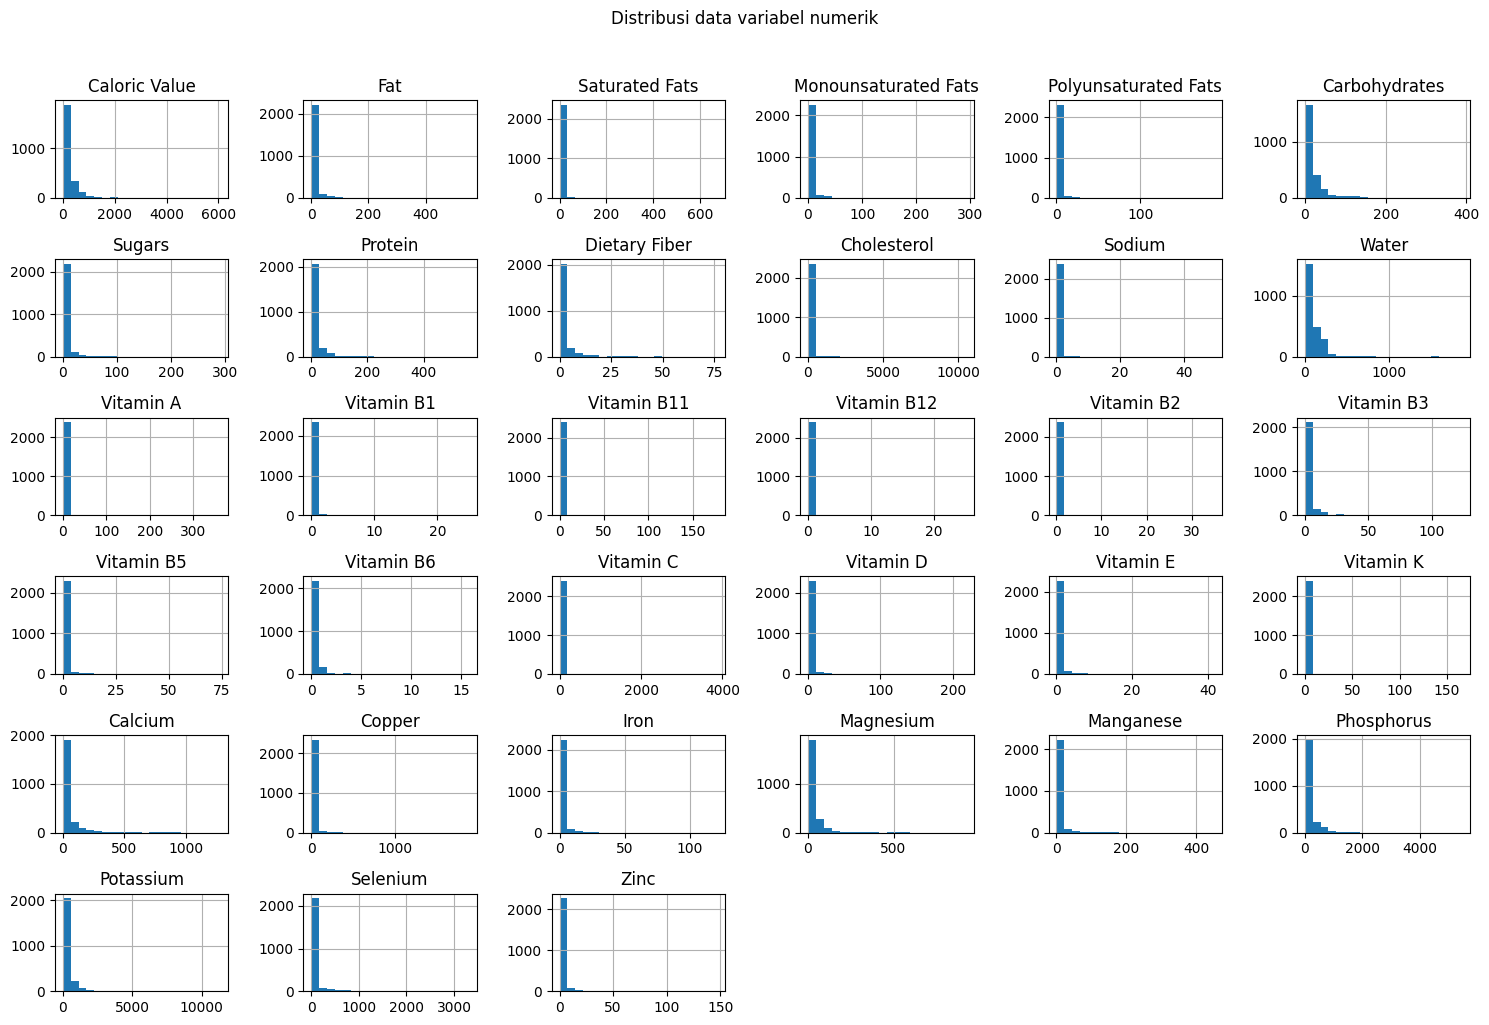

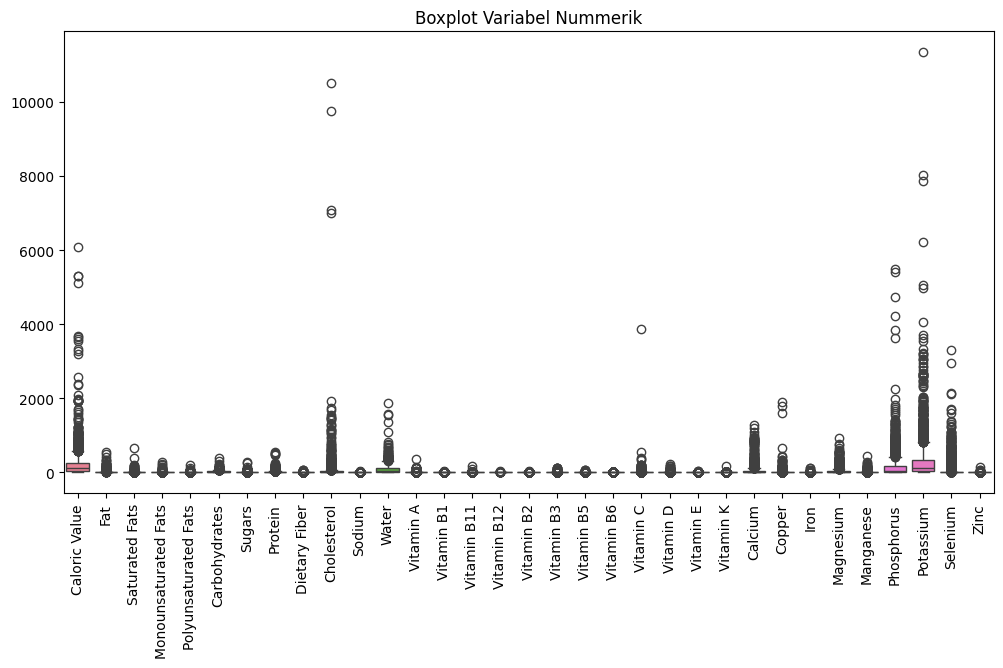

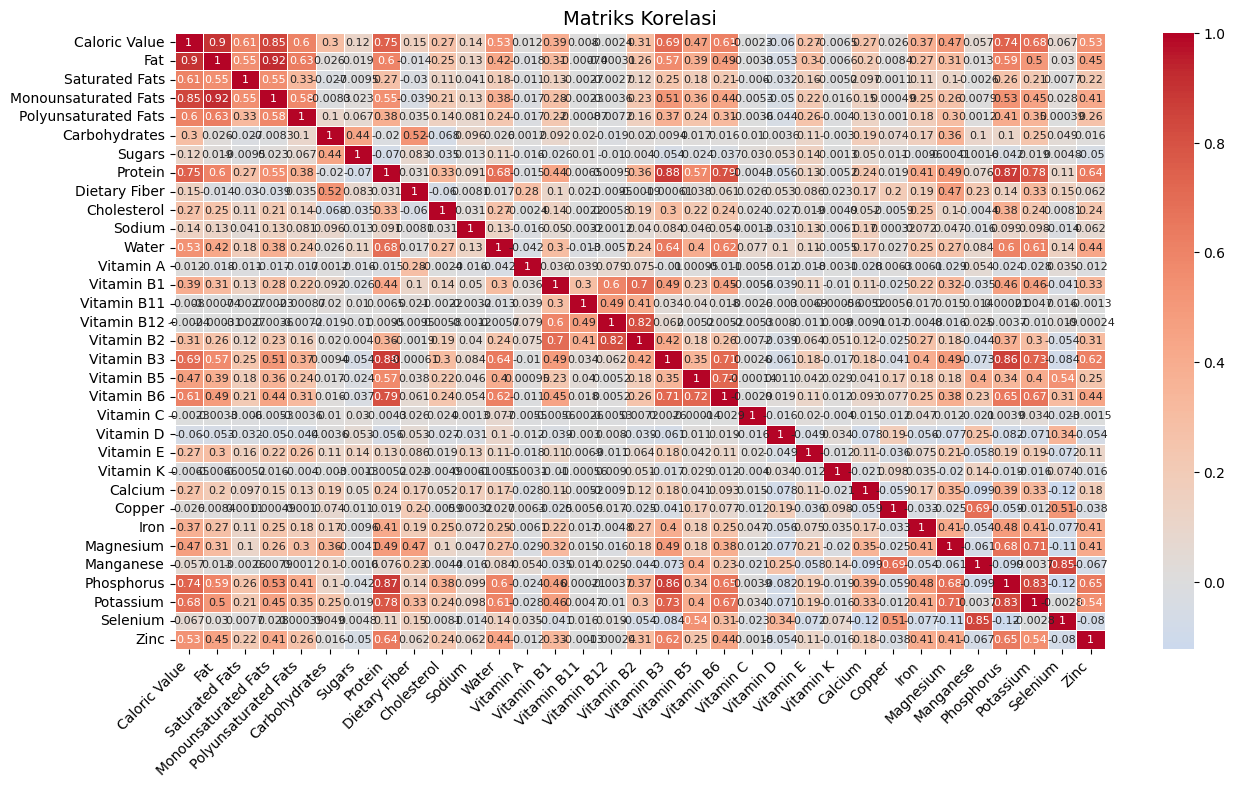

In [5]:
nc = df.select_dtypes(include=['int64','float64']).columns
df[nc].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribusi data variabel numerik", y=1.02)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Boxplot Variabel Nummerik")
plt.xticks(rotation=90)
plt.show()

cm = df[nc].corr()
plt.figure(figsize=(15,8))
sns.heatmap(
    cm, annot=True, cmap='coolwarm', center=0,
    annot_kws={"size":8},
    linewidths=0.5
)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.title("Matriks Korelasi", fontsize=14)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.


Jumlah data duplikat:  0


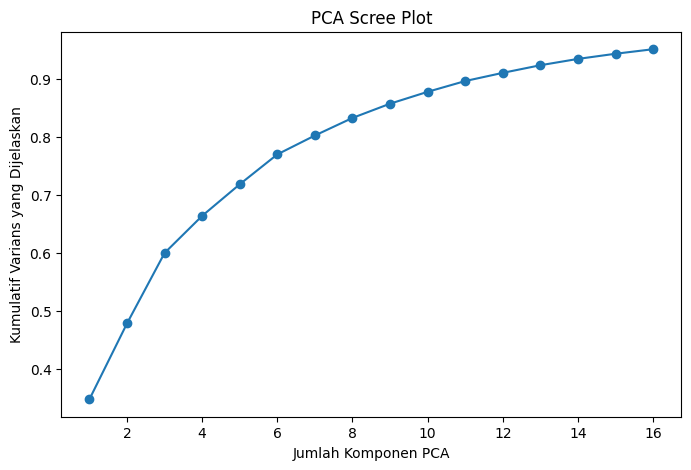

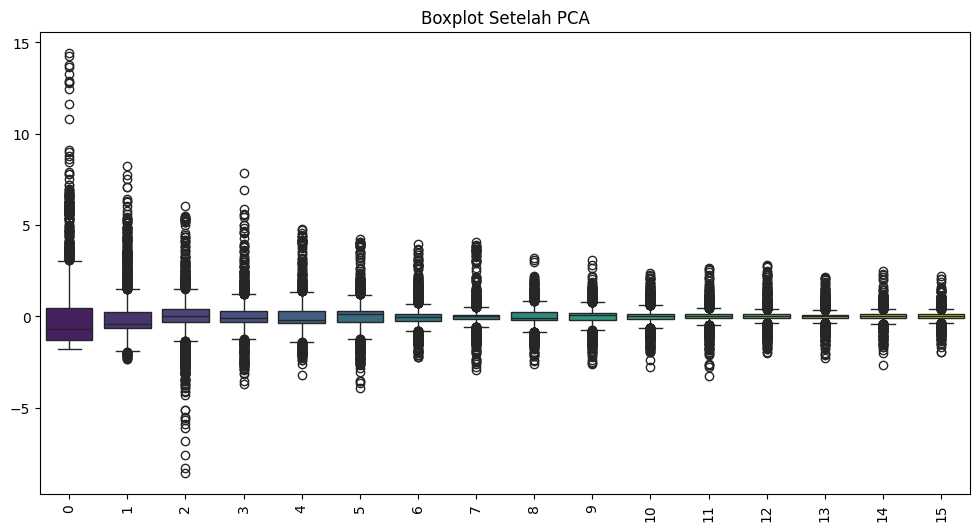

In [6]:
df = df.select_dtypes(include=[np.number])

df = df.drop_duplicates()
print("\nJumlah data duplikat: ", df.duplicated().sum())

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_winsorized = df_scaled.apply(lambda x: winsorize(x, limits=[0.01, 0.01]))  
df_clipped = df_scaled.clip(lower=df_scaled.quantile(0.01), upper=df_scaled.quantile(0.99), axis=1)
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_winsorized)  

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Kumulatif Varians yang Dijelaskan")
plt.title("PCA Scree Plot")
plt.show()

df_pca_df = pd.DataFrame(df_pca)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_pca_df, palette="viridis")
plt.xticks(rotation=90)
plt.title("Boxplot Setelah PCA")
plt.show()

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# === 1. Load Data ===
df = pd.read_csv("nama_file.csv")  # Ganti dengan nama file asli

# === 2. Normalisasi Data ===
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# === 3. Menangani Outlier dengan Winsorizing ===
df_winsorized = df_scaled.apply(lambda x: winsorize(x, limits=[0.01, 0.01]))  # Memotong 1% dari sisi atas dan bawah

# === 4. Menangani Outlier dengan Clipping (Opsional) ===
df_clipped = df_scaled.clip(lower=df_scaled.quantile(0.01), upper=df_scaled.quantile(0.99), axis=1)

# === 5. Reduksi Dimensi dengan PCA ===
pca = PCA(n_components=0.95)  # Menyimpan 95% varians
df_pca = pca.fit_transform(df_winsorized)  # Bisa ganti dengan df_clipped jika ingin coba clipping

# Visualisasi Variance Explained
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Jumlah Komponen PCA")
plt.ylabel("Kumulatif Varians yang Dijelaskan")
plt.title("PCA Scree Plot")
plt.show()

# === 6. Clustering dengan K-Means ===
inertia = []
silhouette_scores = []
K_range = range(2, 10)  # Coba K dari 2 sampai 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, labels))

# Menampilkan Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.show()

# Menampilkan Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Evaluasi K-Means")
plt.show()

# Pilih K terbaik berdasarkan hasil Elbow dan Silhouette
optimal_k = K_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_pca)

# === 7. Opsional: Coba DBSCAN jika K-Means kurang bagus ===
dbscan = DBSCAN(eps=1, min_samples=5)  # Atur parameter sesuai dataset
df["Cluster_DBSCAN"] = dbscan.fit_predict(df_pca)

# === 8. Visualisasi Hasil Clustering ===
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["Cluster"], palette="Set2", alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Clustering dengan K-Means")
plt.legend(title="Cluster")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'nama_file.csv'

In [ ]:


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

nc = df.select_dtypes(include=['int64', 'float64']).columns
#df = df[nc].copy()

scaler = RobustScaler()
#df = scaler.fit_transform(df)
#df = pd.DataFrame(df, columns=nc) 
df[nc] = scaler.fit_transform(df[nc])

#for c in nc:
#    z_sc = np.abs(stats.zscore(df[c]))
#    outliers = df[z_sc > 3]

#    if not outliers.empty:
#        df = df[z_sc <= 3]
#        print(f"Outlier di {c}: {len(outliers)} ditemukan -> Ditangani")


df = df[nc].copy()
print("\nData setelah pembersihan outlier:", df.shape)



Jumlah data duplikat:  0

Data setelah pembersihan outlier: (2394, 33)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Cluster
1    1810
2     250
0     177
3     157
Name: count, dtype: int64


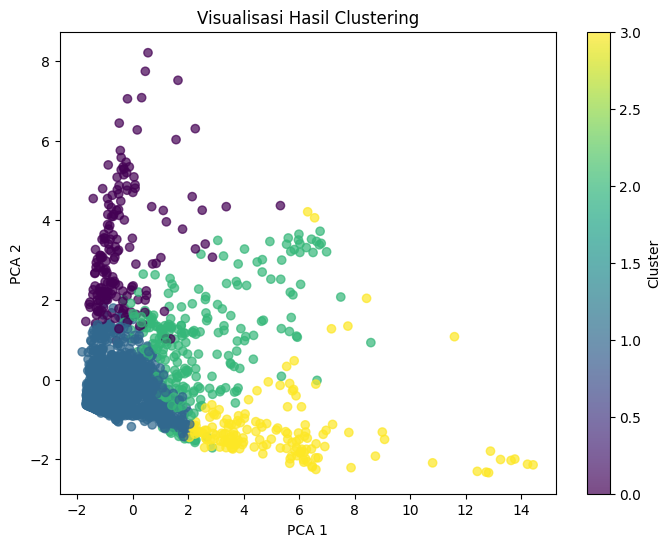

In [8]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df_pca_df['Cluster'] = kmeans.fit_predict(df_pca_df.values)

print(df_pca_df['Cluster'].value_counts())

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_df.iloc[:, 0], df_pca_df.iloc[:, 1], c=df_pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Hasil Clustering")
plt.colorbar(label="Cluster")
plt.show()

In [ ]:
if df.shape[1] > 10:
    pca = PCA(n_components=0.95)
    df_scaled = pca.fit_transform(df)
    print(f"Reduksi dimensi dari {df.shape[1]} ke {pca.n_components_} komponen")

wcss = []
sil_scores = []
max_clusters = 10  

for k in range(2, max_clusters+1):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        init='k-means++',  
        max_iter=300,      
        n_init=10          
    )
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(df_scaled, kmeans.labels_))

explained_variance = np.sum(pca.explained_variance_ratio_)
print(f"Variansi yang dipertahankan: {explained_variance * 100:.2f}%")

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(2,max_clusters+1), wcss, 'bo-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS (Scaled)')
plt.title('Modified Elbow Method')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(range(2,max_clusters+1), sil_scores, 'ro-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

diff = np.diff(wcss)
optimal_k = np.argmax(diff < (0.1 * max(wcss))) + 2  

print(f"\nRekomendasi jumlah cluster: {optimal_k}")
print(f"WCSS pada k={optimal_k}: {wcss[6-2]:.2f}")
print(f"Silhouette Score: {sil_scores[6-2]:.3f}")

final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = final_kmeans.fit_predict(df_scaled)

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

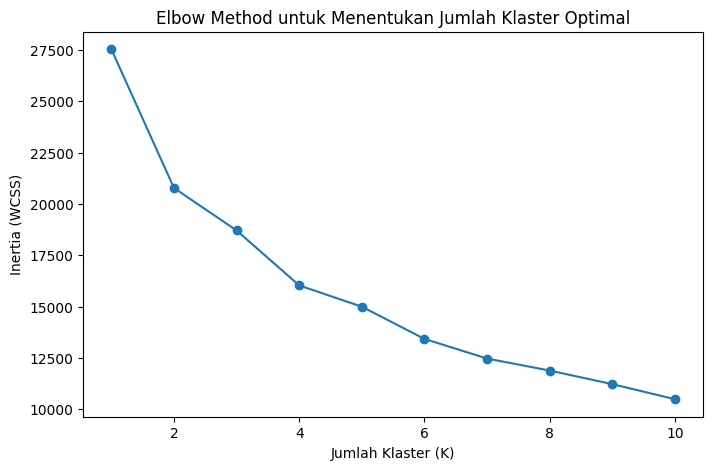

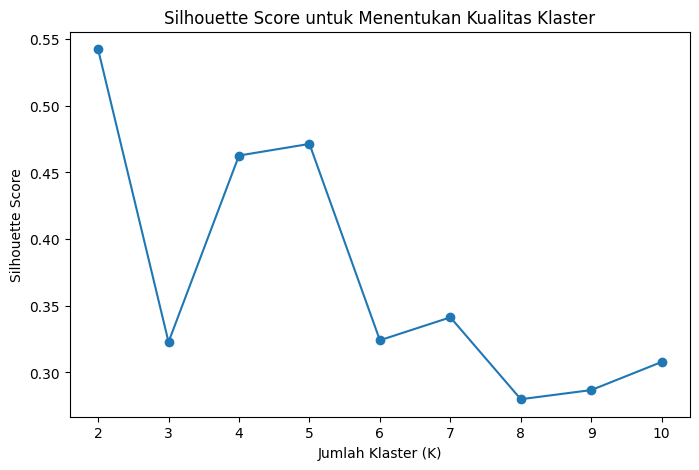

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)  
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca_df.iloc[:, :-1])  
    inertia.append(kmeans.inertia_)  

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method untuk Menentukan Jumlah Klaster Optimal")
plt.show()

K_range_silhouette = range(2, 11)  
silhouette_scores = []

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca_df.iloc[:, :-1])
    score = silhouette_score(df_pca_df.iloc[:, :-1], cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(K_range_silhouette, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Jumlah Klaster (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score untuk Menentukan Kualitas Klaster")
plt.show()



## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

Cluster
1    2103
0     291
Name: count, dtype: int64


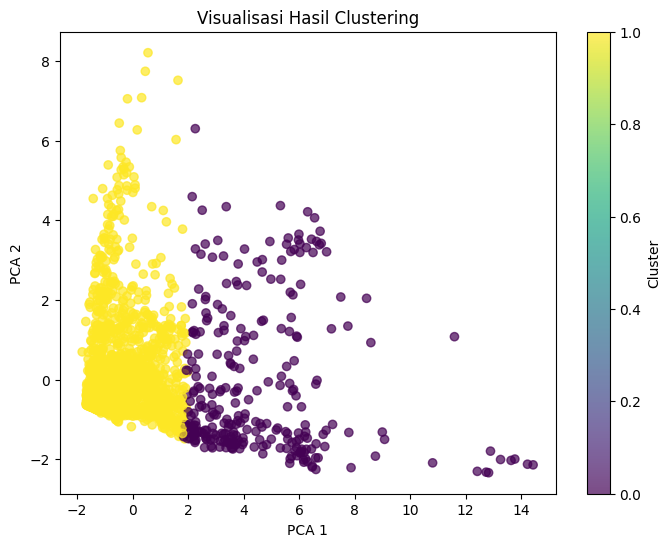

In [11]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
df_pca_df['Cluster'] = kmeans.fit_predict(df_pca_df.values)

print(df_pca_df['Cluster'].value_counts())

plt.figure(figsize=(8, 6))
plt.scatter(df_pca_df.iloc[:, 0], df_pca_df.iloc[:, 1], c=df_pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi Hasil Clustering")
plt.colorbar(label="Cluster")
plt.show()

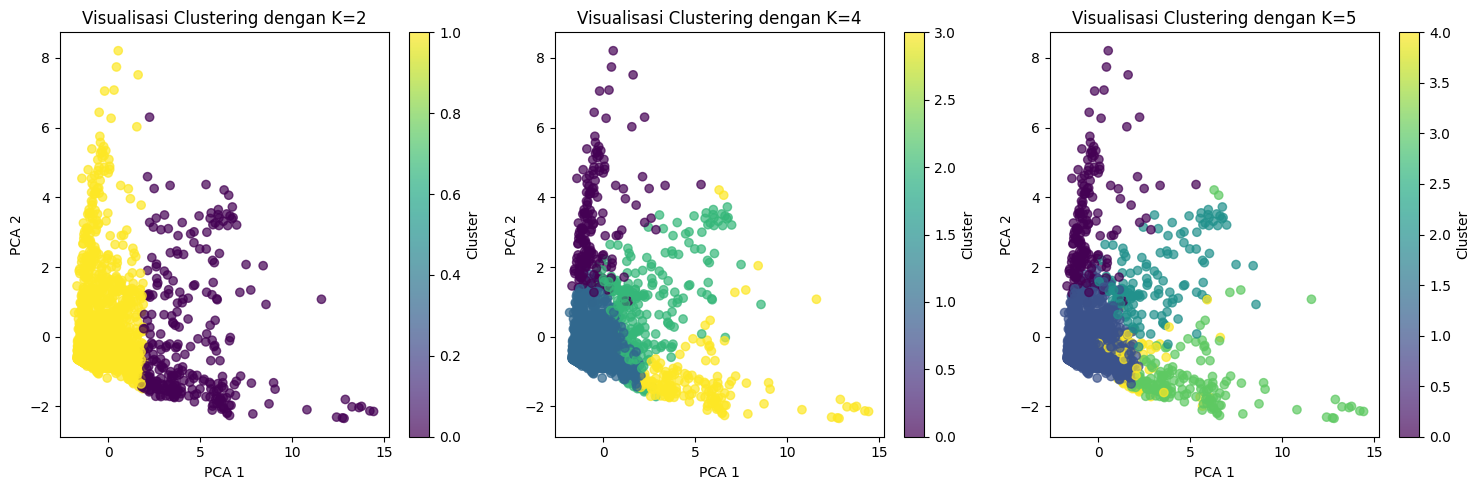

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

cluster_options = [2, 4, 5]

plt.figure(figsize=(15, 5))

for i, k in enumerate(cluster_options, 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    df_pca_df['Cluster'] = kmeans.fit_predict(df_pca_df.iloc[:, :-1]) 

    plt.subplot(1, 3, i)
    plt.scatter(df_pca_df.iloc[:, 0], df_pca_df.iloc[:, 1], c=df_pca_df['Cluster'], cmap='viridis', alpha=0.7)
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.title(f"Visualisasi Clustering dengan K={k}")
    plt.colorbar(label="Cluster")

plt.tight_layout()
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [12]:
df_original = df.copy()
df_numeric = df.select_dtypes(include=['number'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df_original[col] = le.fit_transform(df_original[col])  
    label_encoders[col] = le

pca = PCA(n_components=0.95)
df_pca = pca.fit_transform(df_scaled)

k = 2  
kmeans = KMeans(n_clusters=k, random_state=42)
df_clustered = pd.DataFrame(df_pca)
df_clustered['Cluster'] = kmeans.fit_predict(df_clustered)

df_scaled_inv = scaler.inverse_transform(df_scaled)
df_original[df_numeric.columns] = df_scaled_inv  

for col in categorical_columns:
    df_original[col] = label_encoders[col].inverse_transform(df_original[col])

df_original['Cluster'] = df_clustered['Cluster']

print(df_original)


            Caloric Value     Fat  Saturated Fats  Monounsaturated Fats  \
Unnamed: 0                                                                
0                    51.0   5.000    2.900000e+00                 1.300   
1                   215.0  19.400    1.090000e+01                 4.900   
2                    49.0   3.600    2.300000e+00                 0.900   
3                    30.0   2.000    1.300000e+00                 0.500   
4                    30.0   2.300    1.400000e+00                 0.600   
...                   ...     ...             ...                   ...   
717                  25.0   0.095   -4.440892e-16                 0.000   
718                   1.0   0.099    2.700000e-02                 0.000   
719                   4.0   0.070    5.600000e-02                 0.031   
720                  19.0   0.300    3.600000e-02                 0.016   
721                   5.0   0.035    1.600000e-02                 0.039   

            Polyunsatura

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [13]:
df = df.select_dtypes(include=[np.number])

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df.columns)

print("\nData setelah dikembalikan ke skala aslinya:")
print(df_inverse.head())

df_original = df_inverse



Data setelah dikembalikan ke skala aslinya:
   Caloric Value   Fat  Saturated Fats  Monounsaturated Fats  \
0           51.0   5.0             2.9                   1.3   
1          215.0  19.4            10.9                   4.9   
2           49.0   3.6             2.3                   0.9   
3           30.0   2.0             1.3                   0.5   
4           30.0   2.3             1.4                   0.6   

   Polyunsaturated Fats  Carbohydrates  Sugars  Protein  Dietary Fiber  \
0                 0.200            0.8   0.500      0.9            0.0   
1                 0.800            3.1   2.700      7.8            0.0   
2                 0.000            0.9   3.400      0.8            0.1   
3                 0.002            1.5   0.091      1.5            0.0   
4                 0.042            1.2   0.900      1.2            0.0   

   Cholesterol  ...  Vitamin K  Calcium  Copper   Iron  Magnesium  \
0         14.6  ...      0.100    0.008  14.100  0.082  

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [14]:
print("Jumlah sampel dalam setiap cluster:")
print(df_pca_df['Cluster'].value_counts())

df_pca_df['Cluster'] = df_pca_df['Cluster'].astype(int)
df_clustered = df_original.copy()  
df_clustered['Cluster'] = df_pca_df['Cluster']

print("\nStatistik deskriptif tiap cluster:")
print(df_clustered.groupby('Cluster').mean())
selected_features1 = ['Protein', 'Caloric Value', 'Cluster']
selected_features2 = ['Fat', 'Sugars', 'Cluster']
df_clustered[selected_features1].groupby('Cluster').describe()


Jumlah sampel dalam setiap cluster:
Cluster
1    2103
0     291
Name: count, dtype: int64

Statistik deskriptif tiap cluster:
         Caloric Value        Fat  Saturated Fats  Monounsaturated Fats  \
Cluster                                                                   
0           839.085911  48.783849       15.598969             19.306192   
1           138.732287   4.838840        2.311401              2.036102   

         Polyunsaturated Fats  Carbohydrates    Sugars    Protein  \
Cluster                                                             
0                    9.097251      36.421017  5.356701  63.114089   
1                    1.192944      16.130380  4.335147   6.528132   

         Dietary Fiber  Cholesterol  ...  Vitamin K     Calcium    Copper  \
Cluster                              ...                                    
0             6.047079   359.753952  ...   0.065704  160.462440  6.613271   
1             1.709471    21.023961  ...   0.217258   37.070727  

Protein                                                       \
          count       mean        std  min    25%   50%   75%    max   
Cluster                                                                
0         291.0  63.114089  70.878735  0.0  28.20  51.4  76.0  560.3   
1        2103.0   6.528132  10.257242  0.0   0.55   2.5   7.5  175.0   

        Caloric Value                                                      \
                count        mean         std    min    25%    50%    75%   
Cluster                                                                     
0               291.0  839.085911  771.029211  125.0  474.0  662.0  858.0   
1              2103.0  138.732287  163.969858    0.0   37.5   99.0  188.0   

                 
            max  
Cluster          
0        6077.0  
1        3336.0

In [15]:
df_clustered[selected_features2].groupby('Cluster').describe()

Fat                                                        Sugars  \
          count       mean        std  min    25%   50%    75%    max   count   
Cluster                                                                         
0         291.0  48.783849  67.615440  0.5  10.45  35.0  60.95  550.7   291.0   
1        2103.0   4.838840   9.631493  0.0   0.20   1.3   6.40  218.0  2103.0   

                                                          
             mean        std  min  25%  50%   75%    max  
Cluster                                                   
0        5.356701  22.357672  0.0  0.0  0.0  1.10  291.5  
1        4.335147  11.557442  0.0  0.0  0.2  3.35  255.0

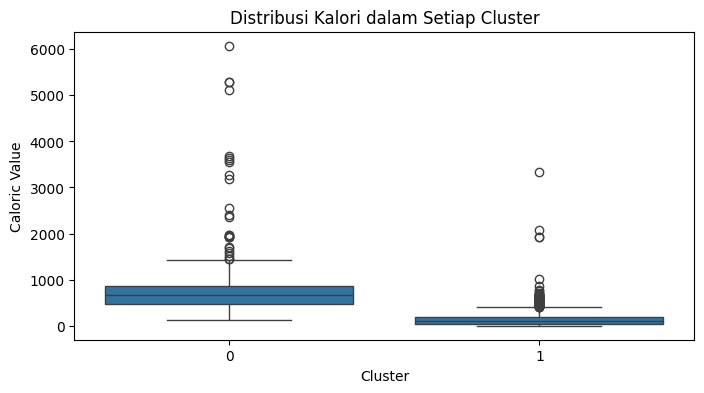

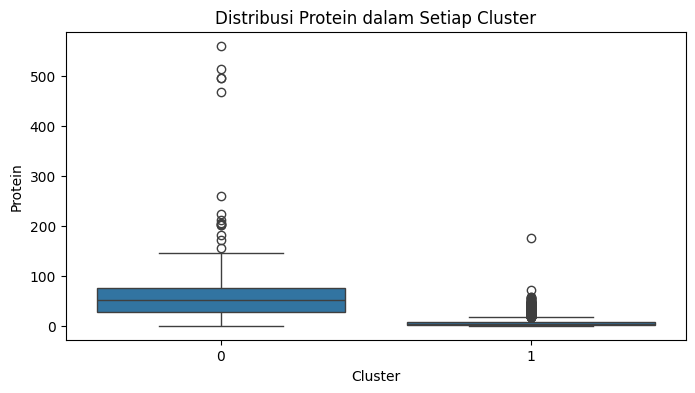

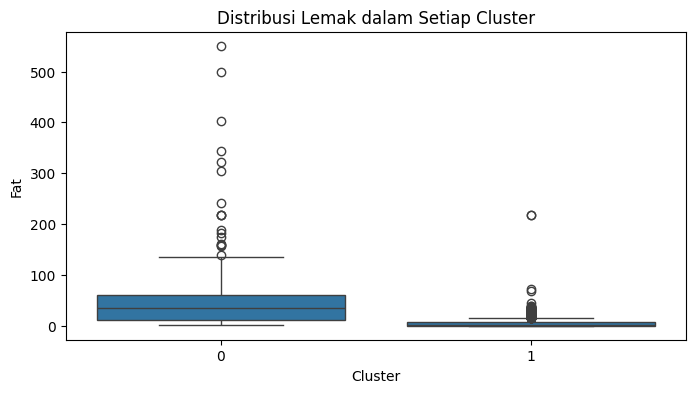

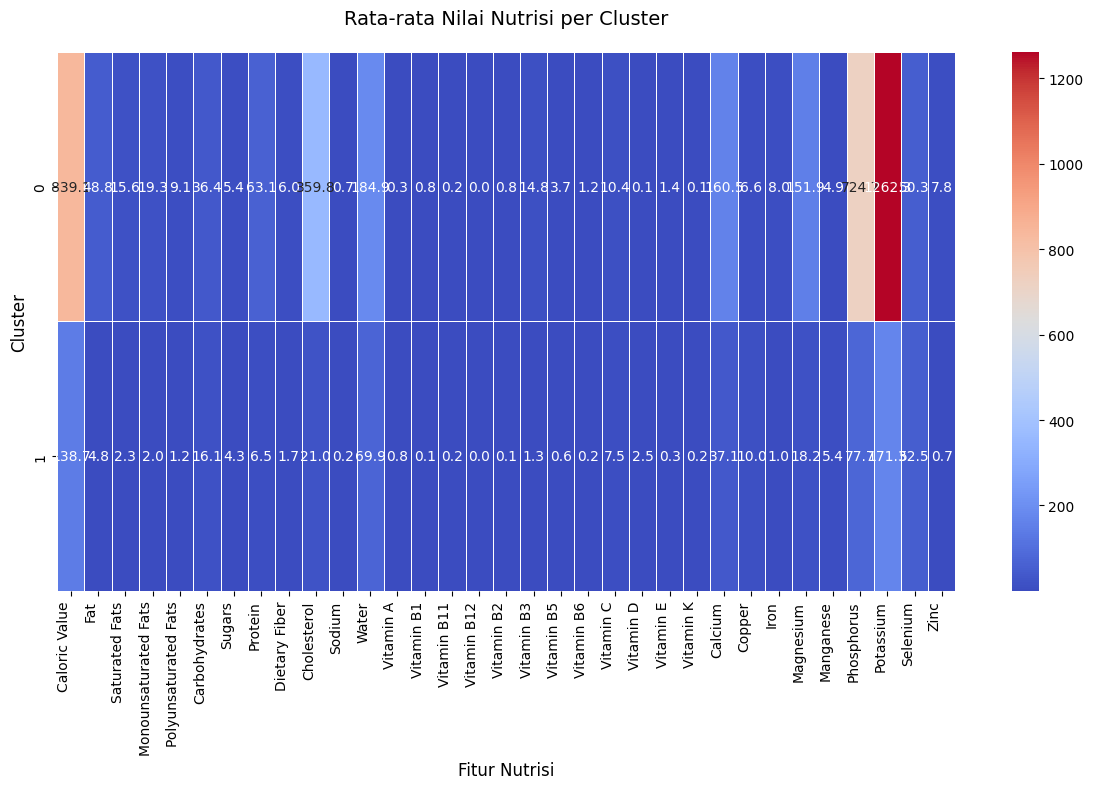

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="Cluster", y="Caloric Value", data=df_clustered)
plt.title("Distribusi Kalori dalam Setiap Cluster")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x="Cluster", y="Protein", data=df_clustered)
plt.title("Distribusi Protein dalam Setiap Cluster")
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x="Cluster", y="Fat", data=df_clustered)
plt.title("Distribusi Lemak dalam Setiap Cluster")
plt.show()

plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_clustered.groupby('Cluster').mean(), 
                      annot=True, 
                      cmap="coolwarm",
                      fmt=".1f",  
                      linewidths=0.5,
                      annot_kws={"size": 10})
plt.title("Rata-rata Nilai Nutrisi per Cluster", pad=20, fontsize=14)
plt.xlabel("Fitur Nutrisi", fontsize=12)
plt.ylabel("Cluster", fontsize=12)
heatmap.set_xticklabels(heatmap.get_xticklabels(), 
                       rotation=90, 
                       horizontalalignment='right')
plt.tight_layout()
plt.show()

Tulis hasil interpretasinya di sini.
## Cluster 0: Kelompok makanan yang tinggi akan Makrokronutrien dan Nutrisi
- **Memiliki nulai tertinggi (Potassium):** 1262.5
- **Memiliki nulai tertinggi (Caloric Value):** 839.2 
- **Analisis:** Cluster ini menunjukkan pola makanan fungsional dengan kalori terkontrol:
 = Rendah lemak tetapi tinggi serat (baik untuk diet)
 = Kaya vitamin (terutama Vitamin C dan B kompleks)
 = Mineral esensial (Potassium dan Magnesium cukup dominan)
 = Protein sedang (cocok untuk kebutuhan harian tanpa berlebihan)

## Cluster 1: Kelompok Makanan Fungsional Rendah Kalori 
- **Rata-rata Caloric value:** 138.7
- **Rata-rata Fat:** 4.83 
- **Analisis:** Cluster ini menunjukkan manajemen nutrisi makanan:
 = Rendah lemak tetapi kaya serat dan vitamin.
 = Komposisi seimbang dengan mineral esensial (Potassium, Magnesium)
 = Keunggulan yakni Kadar gula (Sugars) lebih rendah dibanding Cluster 0
 = Ideal untuk manajemen berat badan
 = Target pengguna Individu aktif yang butuh nutrisi mikro

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [18]:
import os

output_dir = 'cluster_results'
os.makedirs(output_dir, exist_ok=True)

df_original.to_csv(os.path.join(output_dir, 'all_clusters.csv'), index=False)
print(f'\nSemua data telah diekspor ke folder: {output_dir}')


Semua data telah diekspor ke folder: cluster_results
